#### Lets do some statistics on data.json 

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import json
from tqdm import tqdm
from os import path
import pandas as pd
import sys
sys.path.insert(1, '../')
from paths import path_to_project_LB_TD

path_json = path.join(path_to_project_LB_TD,"dataset","data.json")



In [5]:
list_caracteristics = ["smile", "hat", "hair_lenght", "age", "gender"]
with open(path_json) as f:
    data = json.load(f)

dict_stats = {}
for caracteristic in list_caracteristics:
    dict_stats[caracteristic] = {}

for caracteristic in list_caracteristics:
    for i in tqdm(range(len(data))):
        predicted_label = data[str(i)][caracteristic]
        predicted_label_percentage = data[str(i)][caracteristic+"_percentage"]
        if predicted_label not in dict_stats[caracteristic]:
            dict_stats[caracteristic][predicted_label] = [predicted_label_percentage]
        else:
            dict_stats[caracteristic][predicted_label].append(predicted_label_percentage)




100%|██████████| 20/20 [00:00<?, ?it/s]


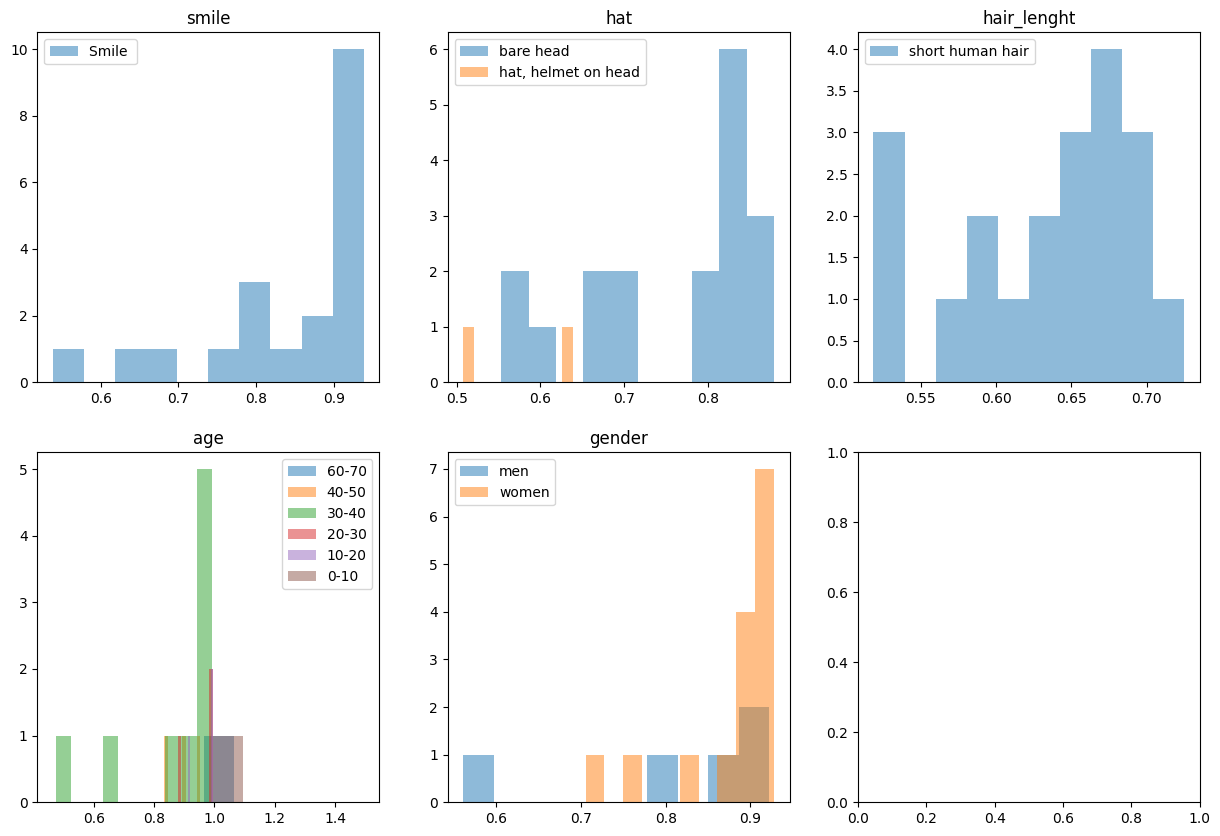

In [11]:
'''Lets plot the results'''

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()
for i, caracteristic in enumerate(list_caracteristics):
    axs[i].set_title(caracteristic)
    for label in dict_stats[caracteristic]:
        axs[i].hist(dict_stats[caracteristic][label], label=label, alpha=0.5)
        axs[i].legend()
plt.show()

In [12]:


'''Lets plot the statistics on a beautiful table'''


df = pd.DataFrame(columns=["caracteristic", "label", "proportion", "mean", "std"])
for caracteristic in list_caracteristics:
    for label in dict_stats[caracteristic]:
        df = df.append({"caracteristic": caracteristic, "label": label, "proportion": len(dict_stats[caracteristic][label])/len(data), "mean": np.mean(dict_stats[caracteristic][label]), "std": np.std(dict_stats[caracteristic][label])}, ignore_index=True)

df = df.sort_values(by=['caracteristic', 'proportion'], ascending=False)
df = df.reset_index(drop=True)
df = df.round(2)
df

,caracteristic,label,proportion,mean,std
0,smile,Smile,1.00,0.84,0.11
1,hat,bare head,0.90,0.76,0.11
2,hat,"hat, helmet on head",0.10,0.57,0.07
3,hair_lenght,short human hair,1.00,0.63,0.06
4,gender,women,0.75,0.88,0.06
5,gender,men,0.25,0.81,0.13
6,age,30-40,0.45,0.87,0.17
7,age,40-50,0.15,0.90,0.05
8,age,20-30,0.15,0.96,0.05
9,age,10-20,0.15,0.97,0.04
